# Librerías

In [1]:
#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Modelado de redes neuronales
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

# Ajuste de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Validación del modelo
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Advertencias
import warnings
warnings.filterwarnings("ignore")

## Exploracion de datos

In [3]:
data = pd.read_csv('datos_caso_4.csv', sep=';')
data

,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Score
0,Negative,6,critical account/ other credits existing (not ...,radio/television,1169,unknown / no savings account,more than 7 years,4,male (single),none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,good
1,0 - 200,48,existing credits paid back duly till now,radio/television,5951,less than 100,1 to 4 years,2,female (divorced/separated/married),none,...,real estate,22,none,own,1,skilled employee / official,1,none,Yes,bad
2,No checking account,12,critical account/ other credits existing (not ...,education,2096,less than 100,4 to 7 years,2,male (single),none,...,real estate,49,none,own,1,unskilled - resident,2,none,Yes,good
3,Negative,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100,4 to 7 years,2,male (single),guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,Yes,good
4,Negative,24,delay in paying off in the past,car (new),4870,less than 100,1 to 4 years,3,male (single),none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,less than 100,4 to 7 years,3,female (divorced/separated/married),none,...,real estate,31,none,own,1,unskilled - resident,1,none,Yes,good
996,Negative,30,existing credits paid back duly till now,car (used),3857,less than 100,1 to 4 years,4,male (divorced/separated),none,...,building society savings agreement/ life insur...,40,none,own,1,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",Yes,good
997,No checking account,12,existing credits paid back duly till now,radio/television,804,less than 100,more than 7 years,4,male (single),none,...,car or other,38,none,own,1,skilled employee / official,1,none,Yes,good
998,Negative,45,existing credits paid back duly till now,radio/television,1845,less than 100,1 to 4 years,4,male (single),none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",Yes,bad


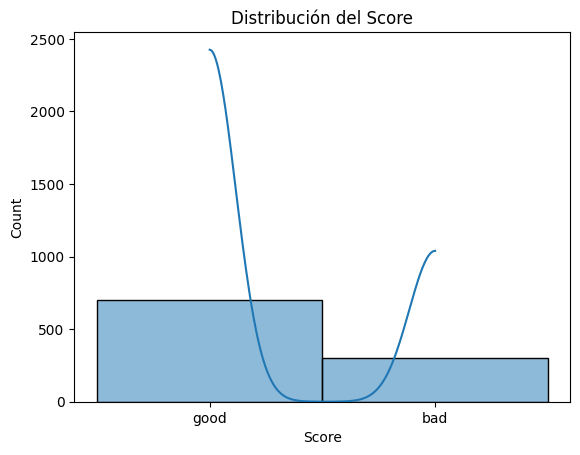

In [13]:
# Distribución de la variable respuesta
sb.histplot(data = data, x = 'Score', kde = True)
plt.title('Distribución del Score')
plt.xlabel('Score')
plt.show()

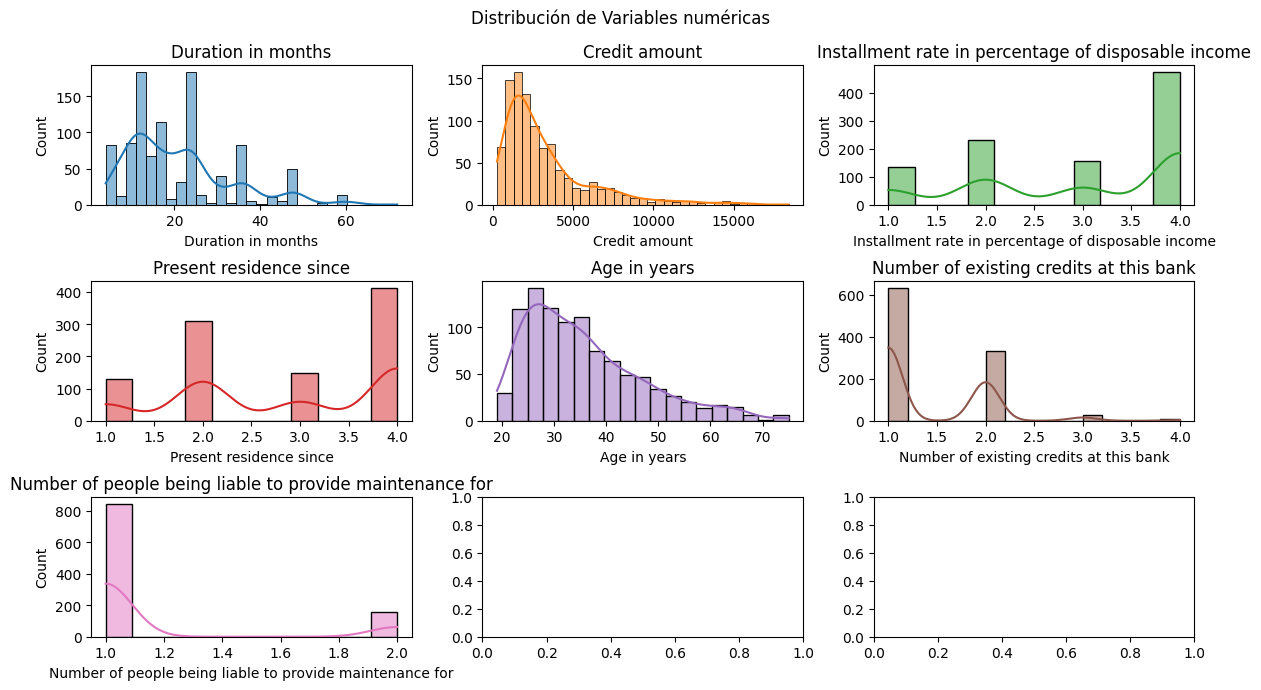

In [5]:
fig, axes = plt.subplots(3, 3, figsize = (12, 7))
axes = axes.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data,
                x = col,
                kde = True,
                color = (list(plt.rcParams['axes.prop_cycle']) * 2)[i]['color'], # *2 para tener + colores
                ax = axes[i])
    axes[i].set_title(col)
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.suptitle('Distribución de Variables numéricas')
plt.show()

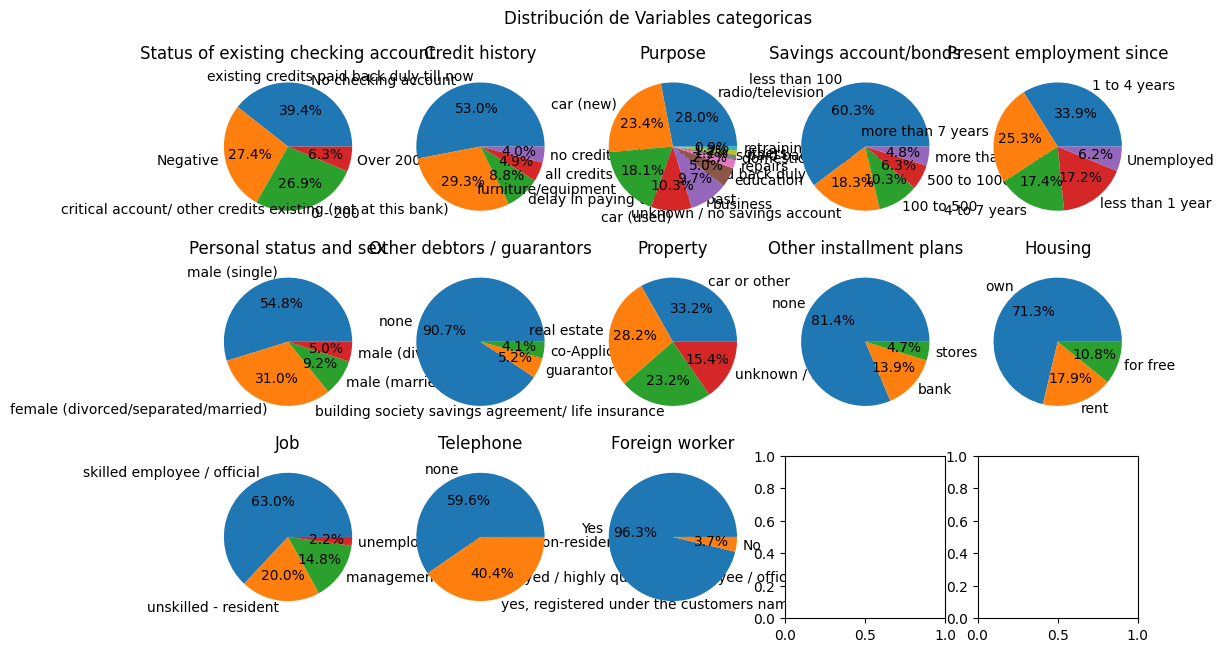

In [14]:
fig, axes = plt.subplots(3, 5, figsize = (12, 7))
axes = axes.flat
cat_col = data.select_dtypes(include = ['object']).columns
cat_col = cat_col.drop('Score')

for i, col in enumerate(cat_col):
    axes[i].pie(x = data[col].value_counts(),
                labels = data[col].value_counts().index,
                autopct = '%0.1f%%')
    axes[i].set_title(col)
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.suptitle('Distribución de Variables categoricas')
plt.show()

In [20]:
data_mod = data.drop(['Telephone', 'Foreign worker', 'Number of people being liable to provide maintenance for'], axis = 1)
data_mod

,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Score
0,Negative,6,critical account/ other credits existing (not ...,radio/television,1169,unknown / no savings account,more than 7 years,4,male (single),none,4,real estate,67,none,own,2,skilled employee / official,good
1,0 - 200,48,existing credits paid back duly till now,radio/television,5951,less than 100,1 to 4 years,2,female (divorced/separated/married),none,2,real estate,22,none,own,1,skilled employee / official,bad
2,No checking account,12,critical account/ other credits existing (not ...,education,2096,less than 100,4 to 7 years,2,male (single),none,3,real estate,49,none,own,1,unskilled - resident,good
3,Negative,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100,4 to 7 years,2,male (single),guarantor,4,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,good
4,Negative,24,delay in paying off in the past,car (new),4870,less than 100,1 to 4 years,3,male (single),none,4,unknown / no property,53,none,for free,2,skilled employee / official,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,less than 100,4 to 7 years,3,female (divorced/separated/married),none,4,real estate,31,none,own,1,unskilled - resident,good
996,Negative,30,existing credits paid back duly till now,car (used),3857,less than 100,1 to 4 years,4,male (divorced/separated),none,4,building society savings agreement/ life insur...,40,none,own,1,management / self-employed / highly qualified ...,good
997,No checking account,12,existing credits paid back duly till now,radio/television,804,less than 100,more than 7 years,4,male (single),none,4,car or other,38,none,own,1,skilled employee / official,good
998,Negative,45,existing credits paid back duly till now,radio/television,1845,less than 100,1 to 4 years,4,male (single),none,4,unknown / no property,23,none,for free,1,skilled employee / official,bad
